<a href="https://colab.research.google.com/github/kalyani234/Forage_BCG_GenAI_FinanceDataChatBot/blob/main/Financial_data_Analysis_ChatBot_BCG_GenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [293]:
import pandas as pd

In [294]:
df = pd.read_csv('/content/companies_financial_data.csv')

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Company                              9 non-null      object 
 1   Fiscal Year End Date                 9 non-null      float64
 2   Total Revenue                        9 non-null      object 
 3   Net Income                           9 non-null      object 
 4   Total Assets                         9 non-null      object 
 5   Total Liabilities                    9 non-null      object 
 6   Cash Flow from Operating Activities  9 non-null      object 
dtypes: float64(1), object(6)
memory usage: 1.9+ KB


In [296]:
df.head(8)

,Company,Fiscal Year End Date,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Tesla,2024.0,"97,690","7,090","122,070","49,693","14,920"
1,Tesla,2023.0,"96,773","14,999","106,618","43,009","13,256"
2,Tesla,2022.0,"81,462","12,583","82,338","37,133","14,724"
3,Microsoft,2024.0,"245,122","88,136","512,163","243,686","118,548"
4,Microsoft,2023.0,"211,915","72,361","411,976","205,753","87,582"
5,Microsoft,2022.0,"198,270","72,738","364,840","198,298","89,035"
6,Apple,2024.0,"391,035","93,736","364,980","308,030","118,254"
7,Apple,2023.0,"383,285","96,995","352,583","290,437","110,543"


In [298]:
df = df.dropna(subset=['Fiscal Year End Date'])
df['Fiscal Year End Date'] = df['Fiscal Year End Date'].astype(int)

In [299]:
df.head()

,Company,Fiscal Year End Date,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
0,Tesla,2024,"97,690","7,090","122,070","49,693","14,920"
1,Tesla,2023,"96,773","14,999","106,618","43,009","13,256"
2,Tesla,2022,"81,462","12,583","82,338","37,133","14,724"
3,Microsoft,2024,"245,122","88,136","512,163","243,686","118,548"
4,Microsoft,2023,"211,915","72,361","411,976","205,753","87,582"


In [300]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Company                              9 non-null      object
 1   Fiscal Year End Date                 9 non-null      int64 
 2   Total Revenue                        9 non-null      object
 3   Net Income                           9 non-null      object
 4   Total Assets                         9 non-null      object
 5   Total Liabilities                    9 non-null      object
 6   Cash Flow from Operating Activities  9 non-null      object
dtypes: int64(1), object(6)
memory usage: 576.0+ bytes


In [301]:
numeric_cols = [
    'Total Revenue',
    'Net Income',
    'Total Assets',
    'Total Liabilities',
    'Cash Flow from Operating Activities'
]

In [302]:
# Clean and convert each financial column to float
for col in numeric_cols:
    df[col] = (
        df[col]
        .astype(str)
        # handle commas, currency, and parentheses (negative numbers)
        .replace(r'[£$,]', '', regex=True)
        .replace(r'\((.*?)\)', r'-\1', regex=True)
        .replace('', pd.NA)
        .astype(float)
    )

In [303]:
# Sort for correct growth computation
df = df.sort_values(by=['Company', 'Fiscal Year End Date'])

In [304]:
df.head()

,Company,Fiscal Year End Date,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities
8,Apple,2022,394328.0,99803.0,352755.0,302083.0,122151.0
7,Apple,2023,383285.0,96995.0,352583.0,290437.0,110543.0
6,Apple,2024,391035.0,93736.0,364980.0,308030.0,118254.0
5,Microsoft,2022,198270.0,72738.0,364840.0,198298.0,89035.0
4,Microsoft,2023,211915.0,72361.0,411976.0,205753.0,87582.0


In [305]:
df['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue'].pct_change() * 100

In [306]:
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income'].pct_change() * 100

In [307]:
df["Debt Ratio (%)"] = (df["Total Liabilities"] / df["Total Assets"]) * 100

In [308]:
# a company converts its sales into actual cash.
df["Cash Flow to Revenue Ratio (%)"] = (df["Cash Flow from Operating Activities"] / df["Total Revenue"]) * 100

In [309]:
df.head(9)

,Company,Fiscal Year End Date,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Debt Ratio (%),Cash Flow to Revenue Ratio (%)
8,Apple,2022,394328.0,99803.0,352755.0,302083.0,122151.0,NaN,NaN,85.635356,30.977004
7,Apple,2023,383285.0,96995.0,352583.0,290437.0,110543.0,-2.800461,-2.813543,82.374079,28.840941
6,Apple,2024,391035.0,93736.0,364980.0,308030.0,118254.0,2.021994,-3.359967,84.396405,30.241283
5,Microsoft,2022,198270.0,72738.0,364840.0,198298.0,89035.0,NaN,NaN,54.352045,44.905936
4,Microsoft,2023,211915.0,72361.0,411976.0,205753.0,87582.0,6.882030,-0.518299,49.942958,41.328835
3,Microsoft,2024,245122.0,88136.0,512163.0,243686.0,118548.0,15.669962,21.800417,47.579774,48.362856
2,Tesla,2022,81462.0,12583.0,82338.0,37133.0,14724.0,NaN,NaN,45.098254,18.074685
1,Tesla,2023,96773.0,14999.0,106618.0,43009.0,13256.0,18.795267,19.200509,40.339342,13.698036
0,Tesla,2024,97690.0,7090.0,122070.0,49693.0,14920.0,0.947578,-52.730182,40.708610,15.272802


# Aggregate by Company

In [310]:
# Basic summary by company
company_summary = df.groupby('Company')[['Total Revenue', 'Net Income']].agg(['sum', 'mean', 'max']).round(2)
print(company_summary)


          Total Revenue                      Net Income                   
                    sum       mean       max        sum      mean      max
Company                                                                   
Apple         1168648.0  389549.33  394328.0   290534.0  96844.67  99803.0
Microsoft      655307.0  218435.67  245122.0   233235.0  77745.00  88136.0
Tesla          275925.0   91975.00   97690.0    34672.0  11557.33  14999.0


# Aggregate by Fiscal Year End Date

## All companies combined performed year-over-year

In [311]:
year_summary = df.groupby('Fiscal Year End Date')[['Total Revenue', 'Net Income']].sum().round(2)
print(year_summary)


                      Total Revenue  Net Income
Fiscal Year End Date                           
2022                       674060.0    185124.0
2023                       691973.0    184355.0
2024                       733847.0    188962.0


# Average Growth Rates per Company

In [312]:
growth_summary = df.groupby('Company')[['Revenue Growth (%)', 'Net Income Growth (%)']].mean().round(2)
print(growth_summary)


           Revenue Growth (%)  Net Income Growth (%)
Company                                             
Apple                   -0.39                  -3.09
Microsoft               11.28                  10.64
Tesla                    9.87                 -16.76


In [313]:
# Top revenue each year
top_revenue = df.loc[df.groupby('Fiscal Year End Date')['Total Revenue'].idxmax(), ['Fiscal Year End Date', 'Company', 'Total Revenue']]
print(top_revenue)



# Top net income each year
top_income = df.loc[df.groupby('Fiscal Year End Date')['Net Income'].idxmax(), ['Fiscal Year End Date', 'Company', 'Net Income']]
print(top_income)

   Fiscal Year End Date Company  Total Revenue
8                  2022   Apple       394328.0
7                  2023   Apple       383285.0
6                  2024   Apple       391035.0
   Fiscal Year End Date Company  Net Income
8                  2022   Apple     99803.0
7                  2023   Apple     96995.0
6                  2024   Apple     93736.0


## 📊 Conclusion: Financial Performance Analysis (2022–2024)

After analyzing the financial data of **Apple**, **Microsoft**, and **Tesla** from fiscal years 2022 to 2024, several trends emerge:

1. **Revenue Leadership**
   - Across all three years (2022–2024), **Apple consistently recorded the highest total revenue**, outperforming both Microsoft and Tesla.
   - While Apple’s revenue slightly fluctuated, it remained above £380 billion each year.

2. **Profitability Trends**
   - **Apple also maintained the highest net income** each year, though it showed a slight decline from £99.8B in 2022 to £93.7B in 2024.
   - **Microsoft’s net income** remained relatively stable around £72–88B, indicating consistent profitability.
   - **Tesla**, while smaller in absolute terms, showed stronger *percentage-based growth*, reflecting its rapid business expansion.

3. **Growth Insights**
   - Apple experienced small variations in revenue growth (~–2.8% in 2023, +2% in 2024), suggesting market saturation.
   - Microsoft displayed steady revenue growth (~6–7% year-over-year).
   - Tesla demonstrated the highest growth potential among the three, though from a smaller base.

4. **Overall Trends**
   - **Apple dominates in scale**, **Microsoft** in stability, and **Tesla** in *growth momentum*.
   - The overall industry trend shows strong financial health post-2022, with minor revenue fluctuations tied to market cycles.

---


In [314]:
df['Assets to Liabilities Ratio'] = df['Total Assets'] / df['Total Liabilities']
stability_summary = df.groupby('Company')['Assets to Liabilities Ratio'].mean().round(2)
print(stability_summary)


Company
Apple        1.19
Microsoft    1.98
Tesla        2.38
Name: Assets to Liabilities Ratio, dtype: float64



### 💡 Summary Visualization

To visualize these findings, the bar charts show that:
- Apple remains the top performer in both revenue and net income.
- Microsoft and Tesla follow, with visible upward trends in total revenue over time.

This analysis highlights how **scale, consistency, and growth potential** differ across leading tech companies, providing a holistic view of financial performance across years.


## Compare Revenue over Years for Each Company

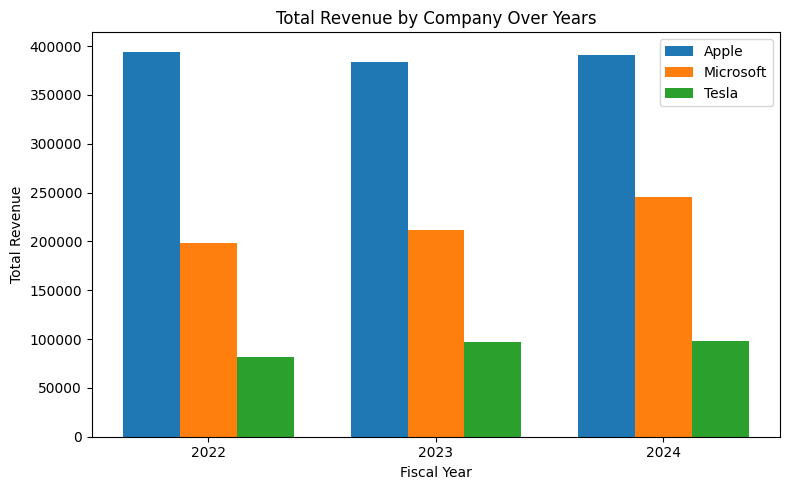

In [315]:
import matplotlib.pyplot as plt
import numpy as np

# Prepare data
companies = df['Company'].unique()
years = sorted(df['Fiscal Year End Date'].unique())

# Create grouped bar chart
bar_width = 0.25
x = np.arange(len(years))

plt.figure(figsize=(8, 5))

for i, company in enumerate(companies):
    company_data = df[df['Company'] == company].sort_values('Fiscal Year End Date')
    plt.bar(x + i*bar_width, company_data['Total Revenue'], width=bar_width, label=company)

plt.xlabel('Fiscal Year')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Company Over Years')
plt.xticks(x + bar_width, years)
plt.legend()
plt.tight_layout()
plt.show()


Overall, Apple maintained the highest revenue and profit but showed slight declines, Microsoft achieved steady balanced growth in both revenue and net income, while Tesla displayed strong revenue expansion but a drop in profitability.


 ## 🧠 Task 2: Developing an AI-Powered Financial Chatbot

In this task, we will build a simple chatbot prototype that can respond to predefined financial queries using the data analyzed in Task 1.  
The chatbot will use basic Python logic to match user queries to pre-prepared answers derived from our dataset.



In [316]:
df.head()

,Company,Fiscal Year End Date,Total Revenue,Net Income,Total Assets,Total Liabilities,Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Debt Ratio (%),Cash Flow to Revenue Ratio (%),Assets to Liabilities Ratio
8,Apple,2022,394328.0,99803.0,352755.0,302083.0,122151.0,NaN,NaN,85.635356,30.977004,1.167742
7,Apple,2023,383285.0,96995.0,352583.0,290437.0,110543.0,-2.800461,-2.813543,82.374079,28.840941,1.213974
6,Apple,2024,391035.0,93736.0,364980.0,308030.0,118254.0,2.021994,-3.359967,84.396405,30.241283,1.184885
5,Microsoft,2022,198270.0,72738.0,364840.0,198298.0,89035.0,NaN,NaN,54.352045,44.905936,1.839857
4,Microsoft,2023,211915.0,72361.0,411976.0,205753.0,87582.0,6.882030,-0.518299,49.942958,41.328835,2.002284


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 8 to 0
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Company                              9 non-null      object 
 1   Fiscal Year End Date                 9 non-null      int64  
 2   Total Revenue                        9 non-null      float64
 3   Net Income                           9 non-null      float64
 4   Total Assets                         9 non-null      float64
 5   Total Liabilities                    9 non-null      float64
 6   Cash Flow from Operating Activities  9 non-null      float64
 7   Revenue Growth (%)                   6 non-null      float64
 8   Net Income Growth (%)                6 non-null      float64
 9   Debt Ratio (%)                       9 non-null      float64
 10  Cash Flow to Revenue Ratio (%)       9 non-null      float64
 11  Assets to Liabilities Ratio          9 no

In [318]:
# Ensure numeric columns are actually numeric
num_cols = [
    'Total Revenue',
    'Net Income',
    'Total Assets',
    'Total Liabilities',
    'Cash Flow from Operating Activities',
    'Revenue Growth (%)',
    'Net Income Growth (%)',
    'Assets to Liabilities Ratio',
    'Debt Ratio (%)',
    'Cash Flow to Revenue Ratio (%)'
]

In [320]:
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Ensure numeric columns are floats
num_cols = [
    'Total Revenue', 'Net Income', 'Total Assets',
    'Total Liabilities', 'Cash Flow from Operating Activities',
    'Revenue Growth (%)', 'Net Income Growth (%)', 'Assets to Liabilities Ratio', 'Debt Ratio (%)', 'Cash Flow to Revenue Ratio (%)'
]
for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# --- Simple Chatbot Function ---
def simple_chatbot(user_query):
    user_query = user_query.lower()
    user_query = user_query.replace("’", "'")  # normalize apostrophes

    # Total combined revenue
    if user_query == "what is the total revenue?":
        total_revenue = df["Total Revenue"].sum()
        return f"The total combined revenue of all companies is £{total_revenue:,.0f}."

    #  Average revenue growth across all companies
    elif user_query == "what is the average revenue growth?":
        avg_growth = df["Revenue Growth (%)"].mean()
        return f"The average revenue growth across all companies is {avg_growth:.2f}%."

    #  Change in net income over the last year
    elif user_query == "how has net income changed over the last year?":
        avg_change = df.groupby("Company")["Net Income"].apply(lambda x: x.pct_change().iloc[-1] * 100)
        avg_change = avg_change.mean()
        direction = "increased" if avg_change > 0 else "decreased"
        return f"On average, the net income has {direction} by {abs(avg_change):.2f}% over the last year."

    # Highest revenue company
    elif user_query == "which company has the highest revenue?":
        top = df.loc[df["Total Revenue"].idxmax()]
        return f"{top['Company']} has the highest revenue of £{top['Total Revenue']:,.0f} in {int(top['Fiscal Year End Date'])}."

    # Highest net income company
    elif user_query == "which company has the highest net income?":
        top = df.loc[df["Net Income"].idxmax()]
        return f"{top['Company']} recorded the highest net income of £{top['Net Income']:,.0f} in {int(top['Fiscal Year End Date'])}."

    # Lowest total revenue
    elif user_query == "which company has the lowest total revenue?":
        lowest = df.loc[df["Total Revenue"].idxmin()]
        return f"{lowest['Company']} recorded the lowest revenue of £{lowest['Total Revenue']:,.0f} in {int(lowest['Fiscal Year End Date'])}."

     #  Highest Total Assets
    elif user_query == "which company has the highest total assets?":
        highest = df.loc[df["Total Assets"].idxmax()]
        return f"{highest['Company']} recorded the highest assets of £{highest['Total Assets']:,.0f} in {int(highest['Fiscal Year End Date'])}."

        #  Lowest Total Assets
    elif user_query == "which company has the lowest total assets?":
        lowest = df.loc[df["Total Assets"].idxmin()]
        return f"{lowest['Company']} recorded the lowest assets of £{lowest['Total Assets']:,.0f} in {int(lowest['Fiscal Year End Date'])}."

    # Average assets-to-liabilities ratio
    elif user_query == "what is the average assets to liabilities ratio?":
        avg_ratio = df["Assets to Liabilities Ratio"].mean()
        return f"The average assets-to-liabilities ratio across companies is {avg_ratio:.2f}."

    # Which company has the strongest balance sheet (highest ratio)
    elif user_query == "which company has the strongest balance sheet?":
        top_ratio = df.groupby("Company")["Assets to Liabilities Ratio"].mean().idxmax()
        return f"{top_ratio} has the strongest balance sheet with the highest average assets-to-liabilities ratio."

    # Which company has the weakest balance sheet (lowest ratio)
    elif user_query == "which company has the weakest balance sheet?":
        low_ratio = df.groupby("Company")["Assets to Liabilities Ratio"].mean().idxmin()
        return f"{low_ratio} has the weakest balance sheet with the lowest average assets-to-liabilities ratio."

      # 📊 Average Cash Flow from Operating Activities
    elif user_query == "what is the average cash flow from operating activities?":
      avg_cf = df["Cash Flow from Operating Activities"].mean()
      return f"The average cash flow from operating activities across all companies is £{avg_cf:,.0f}."

# 🔁 Which company improved its cash flow the most (year-over-year)
    elif user_query == "which company improved its cash flow the most?":
      changes = df.groupby("Company")["Cash Flow from Operating Activities"].apply(lambda x: x.pct_change().iloc[-1] * 100)
      top_company = changes.idxmax()
      top_change = changes.max()
      return f"{top_company} had the highest improvement in cash flow from operating activities, increasing by {top_change:.2f}% over the last year."

    # 💰 Highest Debt Ratio
    elif user_query == "which company has the highest debt ratio?":
      avg_debt = df.groupby("Company")["Debt Ratio (%)"].mean()
      top_company = avg_debt.idxmax()
      top_value = avg_debt.max()
      return f"{top_company} has the highest average debt ratio of {top_value:.2f}%."

    # 🧮 Highest Cash Flow to Revenue Ratio
    elif user_query == "which company has the highest cash flow to revenue ratio?":
      avg_ratio = df.groupby("Company")["Cash Flow to Revenue Ratio (%)"].mean()
      top_company = avg_ratio.idxmax()
      top_value = avg_ratio.max()
      return f"{top_company} has the highest average cash flow-to-revenue ratio at {top_value:.2f}%, indicating strong cash efficiency."


    # Average cash flow from operating activities
    elif user_query == "what is the average cash flow from operating activities?":
        avg_cf = df["Cash Flow from Operating Activities"].mean()
        return f"The average cash flow from operating activities is £{avg_cf:,.0f}."

    # Default fallback
    else:
        return "Sorry, I can only provide information on predefined queries."


In [322]:
# --- Test chatbot interaction ---
print("💬 Financial Chatbot Prototype (type 'exit' to quit)\n")

while True:
    query = input("You: ")
    if query.lower() == "exit":
        print("Chatbot: Goodbye! 👋")
        break
    print("Chatbot:", simple_chatbot(query))

💬 Financial Chatbot Prototype (type 'exit' to quit)

You: what is the average cash flow from operating activities?
Chatbot: The average cash flow from operating activities across all companies is £76,557.
You: which company has the strongest balance sheet?
Chatbot: Tesla has the strongest balance sheet with the highest average assets-to-liabilities ratio.
You: which company has the highest revenue?
Chatbot: Apple has the highest revenue of £394,328 in 2022.
You: how has net income changed over the last year?
Chatbot: On average, the net income has decreased by 11.43% over the last year.
You: what is the total revenue?
Chatbot: The total combined revenue of all companies is £2,099,880.
You: which company has the highest debt ratio?
Chatbot: Apple has the highest average debt ratio of 84.14%.
You: exit
Chatbot: Goodbye! 👋
